In [132]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.linear_model import LogisticRegression

In [133]:
data = fetch_olivetti_faces(data_home="./images/")
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [134]:
data.images.shape

(400, 64, 64)

Text(0.5, 0.98, 'There are 40 distinct people in the dataset')

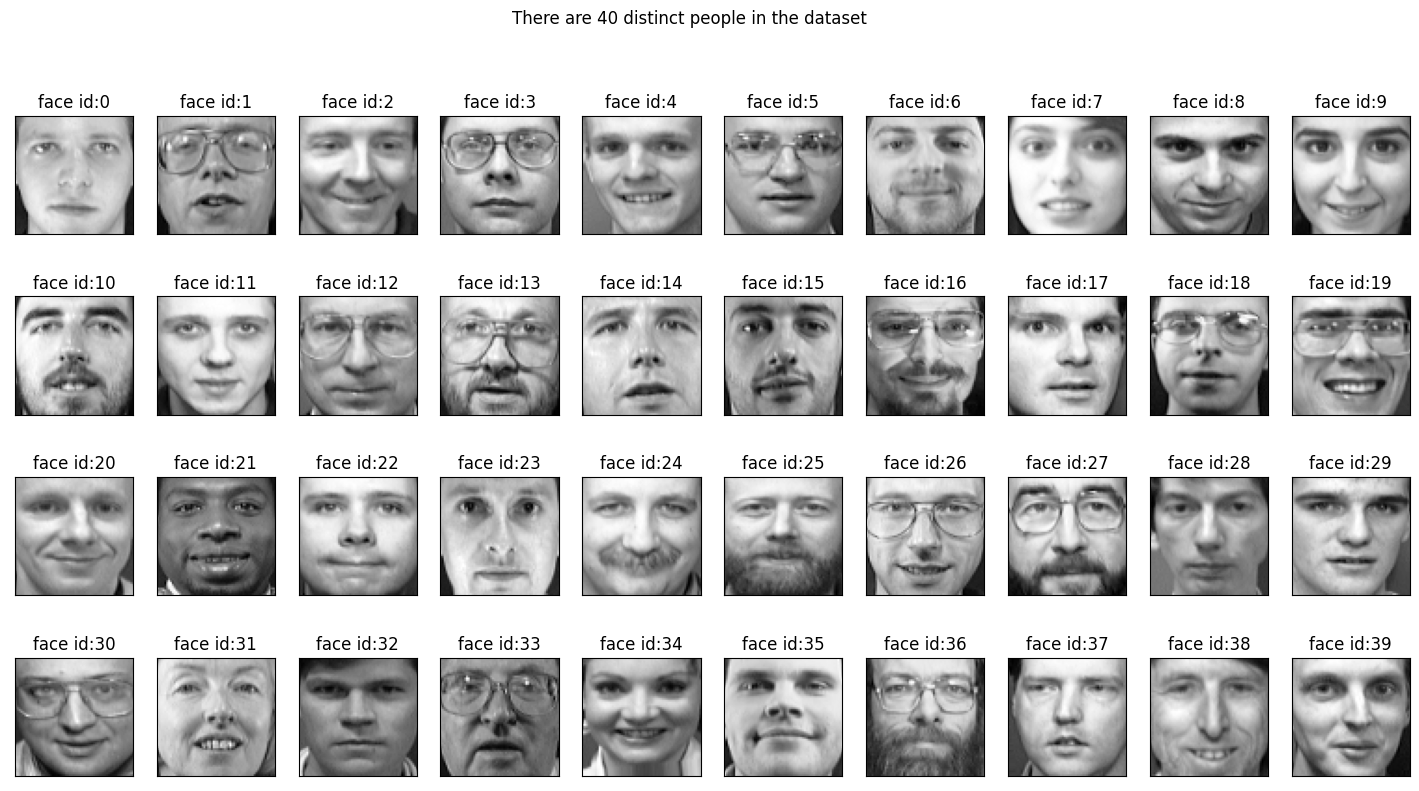

In [135]:
fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
# For easy iteration flattened 4X10 subplots matrix to 40 array
axarr=axarr.flatten()

#iterating over user ids
for unique_id in np.unique(data.target):
    image_index=unique_id*10
    axarr[unique_id].imshow(data.images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
plt.suptitle("There are 40 distinct people in the dataset")

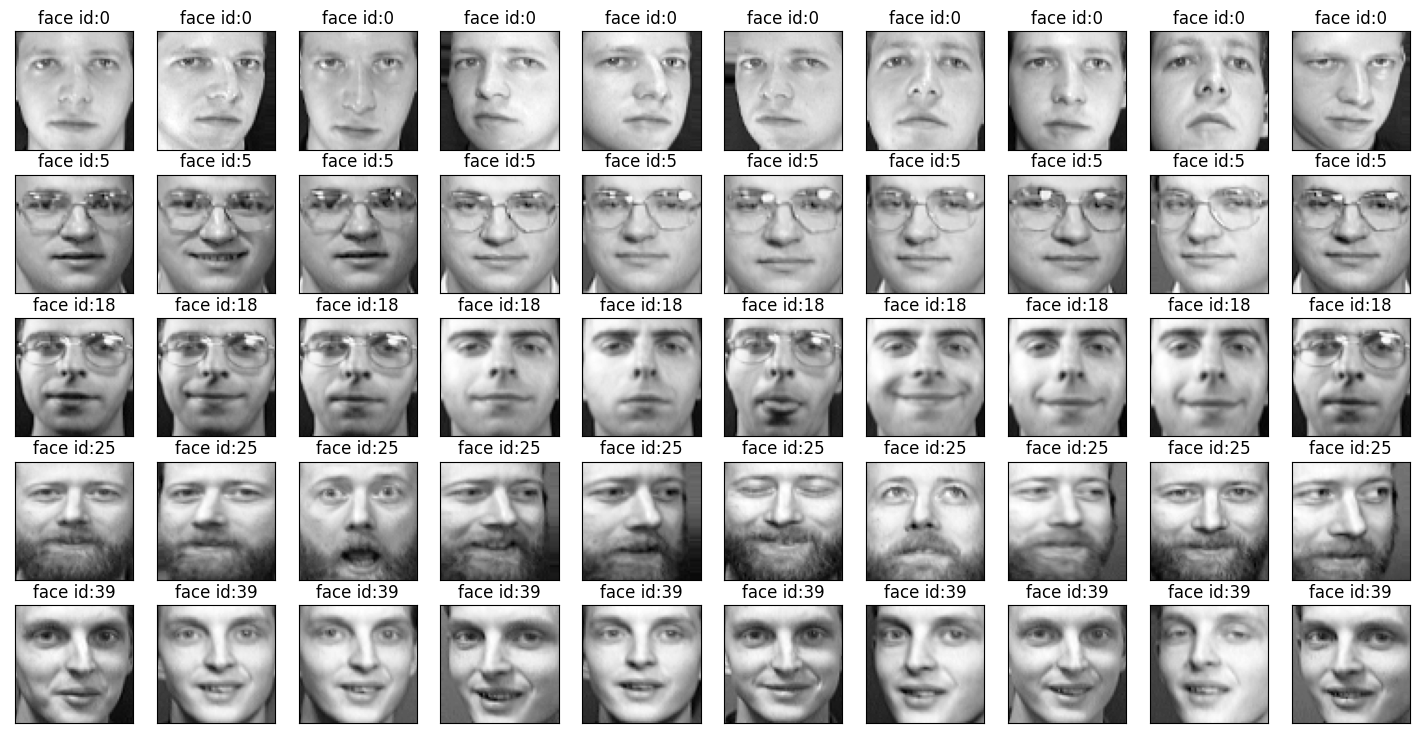

In [136]:
subject_ids = [0,5,18,25,39]
cols=10
rows=(len(subject_ids)*10)/cols #
rows=int(rows)

fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
#axarr=axarr.flatten()

for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
        image_index=subject_id*10 + j
        axarr[i,j].imshow(data.images[image_index], cmap="gray")
        axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])
        axarr[i,j].set_title("face id:{}".format(subject_id))

In [137]:
X = data.images.reshape((data.images.shape[0], data.images.shape[1] * data.images.shape[2]))

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, data.target, test_size=0.3, stratify=data.target, random_state=0
)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [139]:
# plot PCA illustration
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

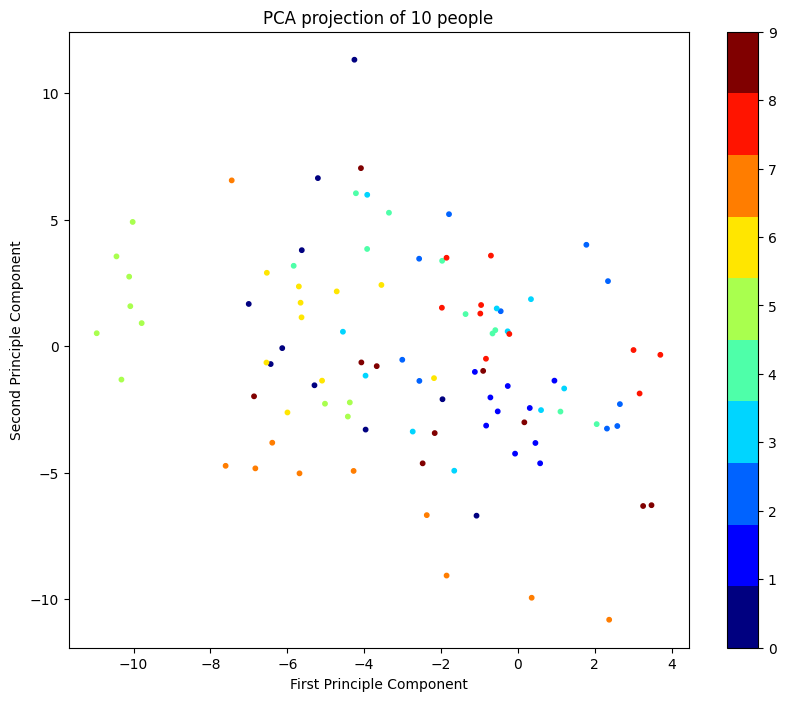

In [140]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=data.target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

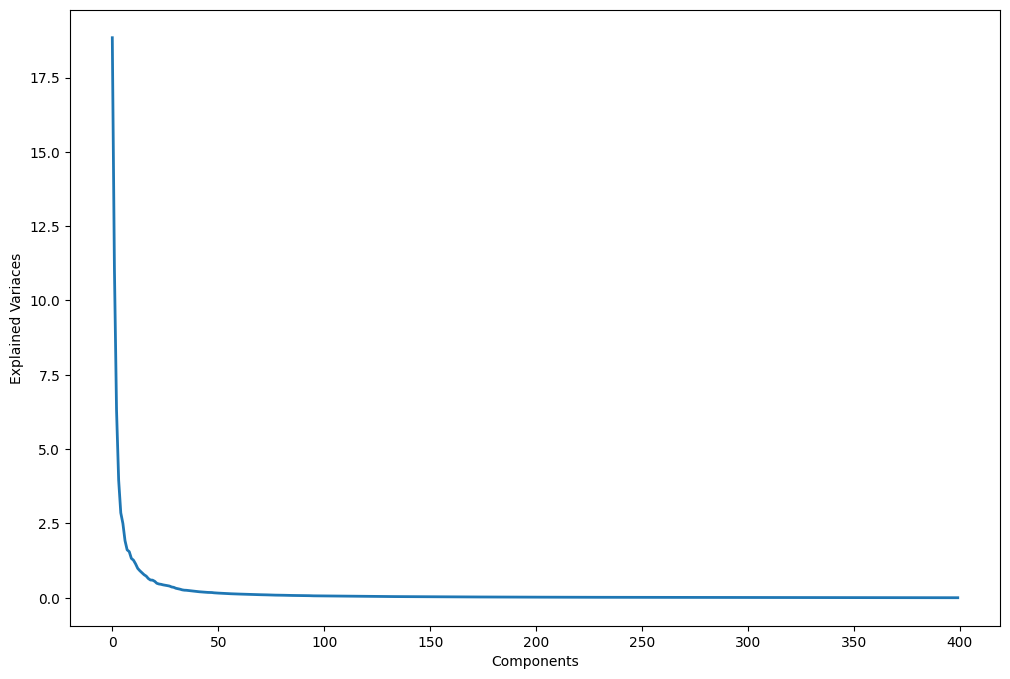

In [141]:
# number of components
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [142]:
n_components = 90

Text(0.5, 1.0, 'Average Face')

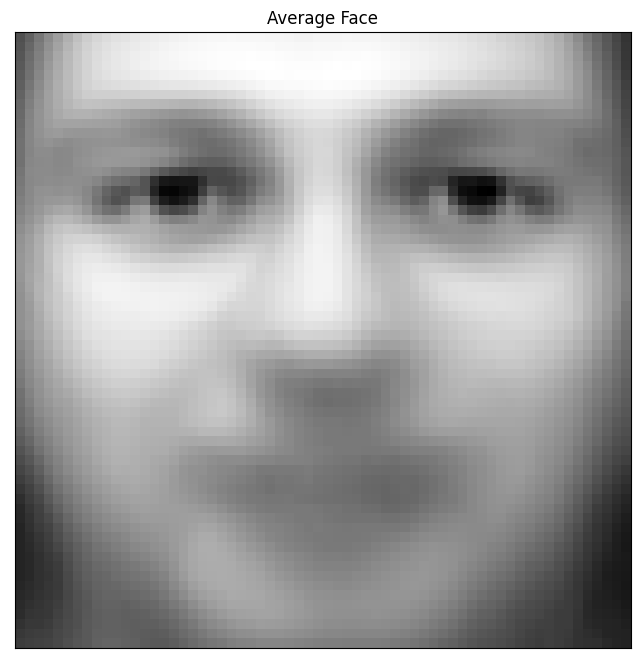

In [143]:
# show avg face
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 1.0, 'Test set')

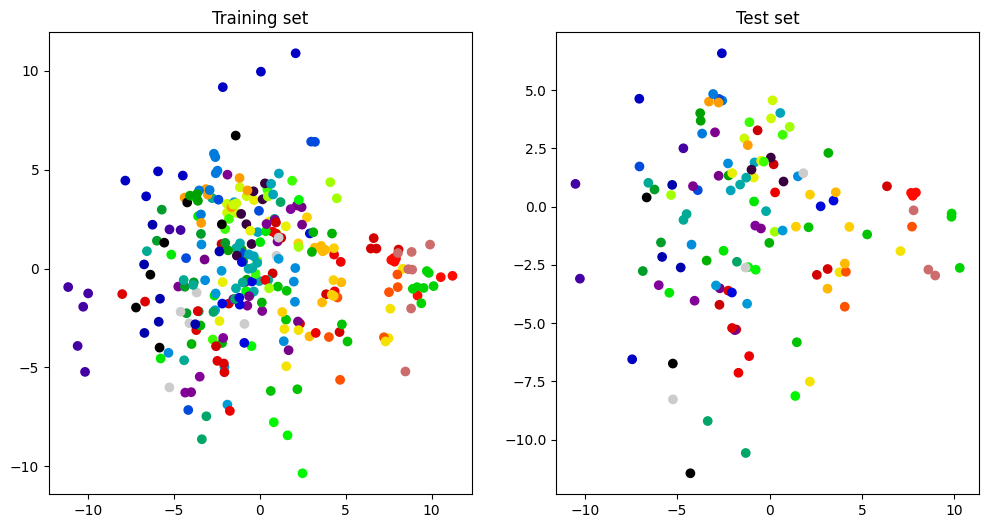

In [144]:
# plot PCA illustration
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axarr[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='nipy_spectral')
axarr[0].set_title("Training set")
axarr[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='nipy_spectral')
axarr[1].set_title("Test set")

In [145]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [10, 100, 250]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(grid_search.best_params_)
print("Grid scores on development set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
y_true, y_pred = y_test, grid_search.predict(X_test)

/Users/sid/Desktop/mat161-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sid/Desktop/mat161-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best parameters set found on development set:
{'max_iter': 250}
Grid scores on development set:
0.775 (+/-0.081) for {'max_iter': 10}
0.904 (+/-0.046) for {'max_iter': 100}
0.918 (+/-0.072) for {'max_iter': 250}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.


/Users/sid/Desktop/mat161-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
lr = LogisticRegression(max_iter=250)
lr.fit(X_train, y_train)

print("Model trained")

Model trained


/Users/sid/Desktop/mat161-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score


print("Mean Accuracy {:.2f}%".format(lr.score(X_test, y_test) * 100))
print("F1 Score {:.2f}%".format(f1_score(y_test, y_pred, average='weighted') * 100))
print("Precision Score {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100))
print("Recall Score {:.2f}%".format(recall_score(y_test, y_pred, average='weighted') * 100))

Mean Accuracy 91.67%
F1 Score 91.27%
Precision Score 94.04%
Recall Score 91.67%


9 90 10


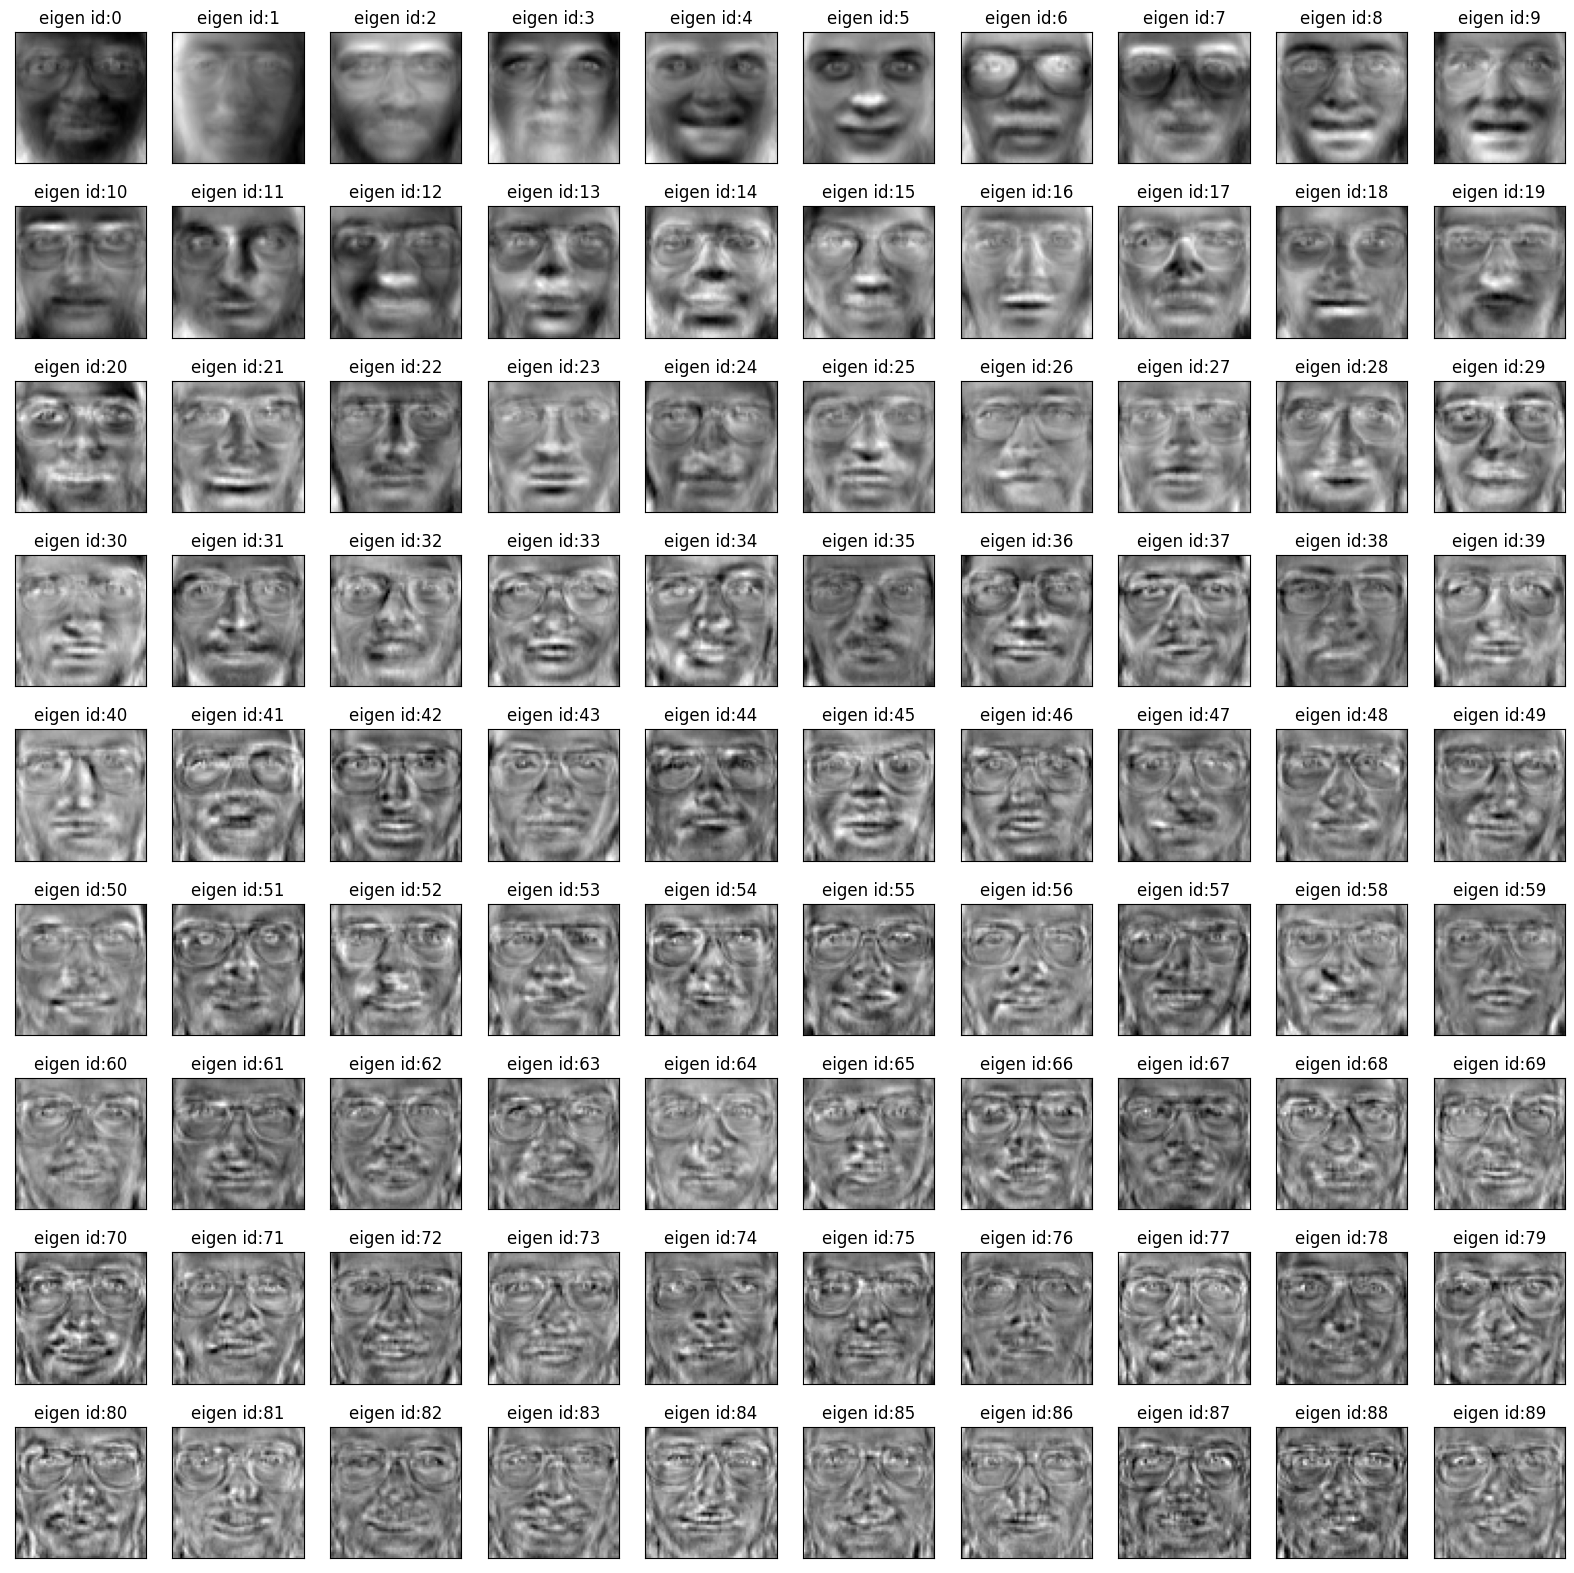

In [148]:
number_of_eigenfaces = len(pca.components_)
# show eigenfaces
eigenfaces = pca.components_.reshape((number_of_eigenfaces, data.images.shape[1], data.images.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
print(rows, number_of_eigenfaces, cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigenfaces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))

In [149]:
# this function accepts and image and returns the predicted match using rf
def predict_match(img, model):
    img = img.reshape((1, img.shape[0] * img.shape[1]))
    match = model.predict(img)
    return match[0]

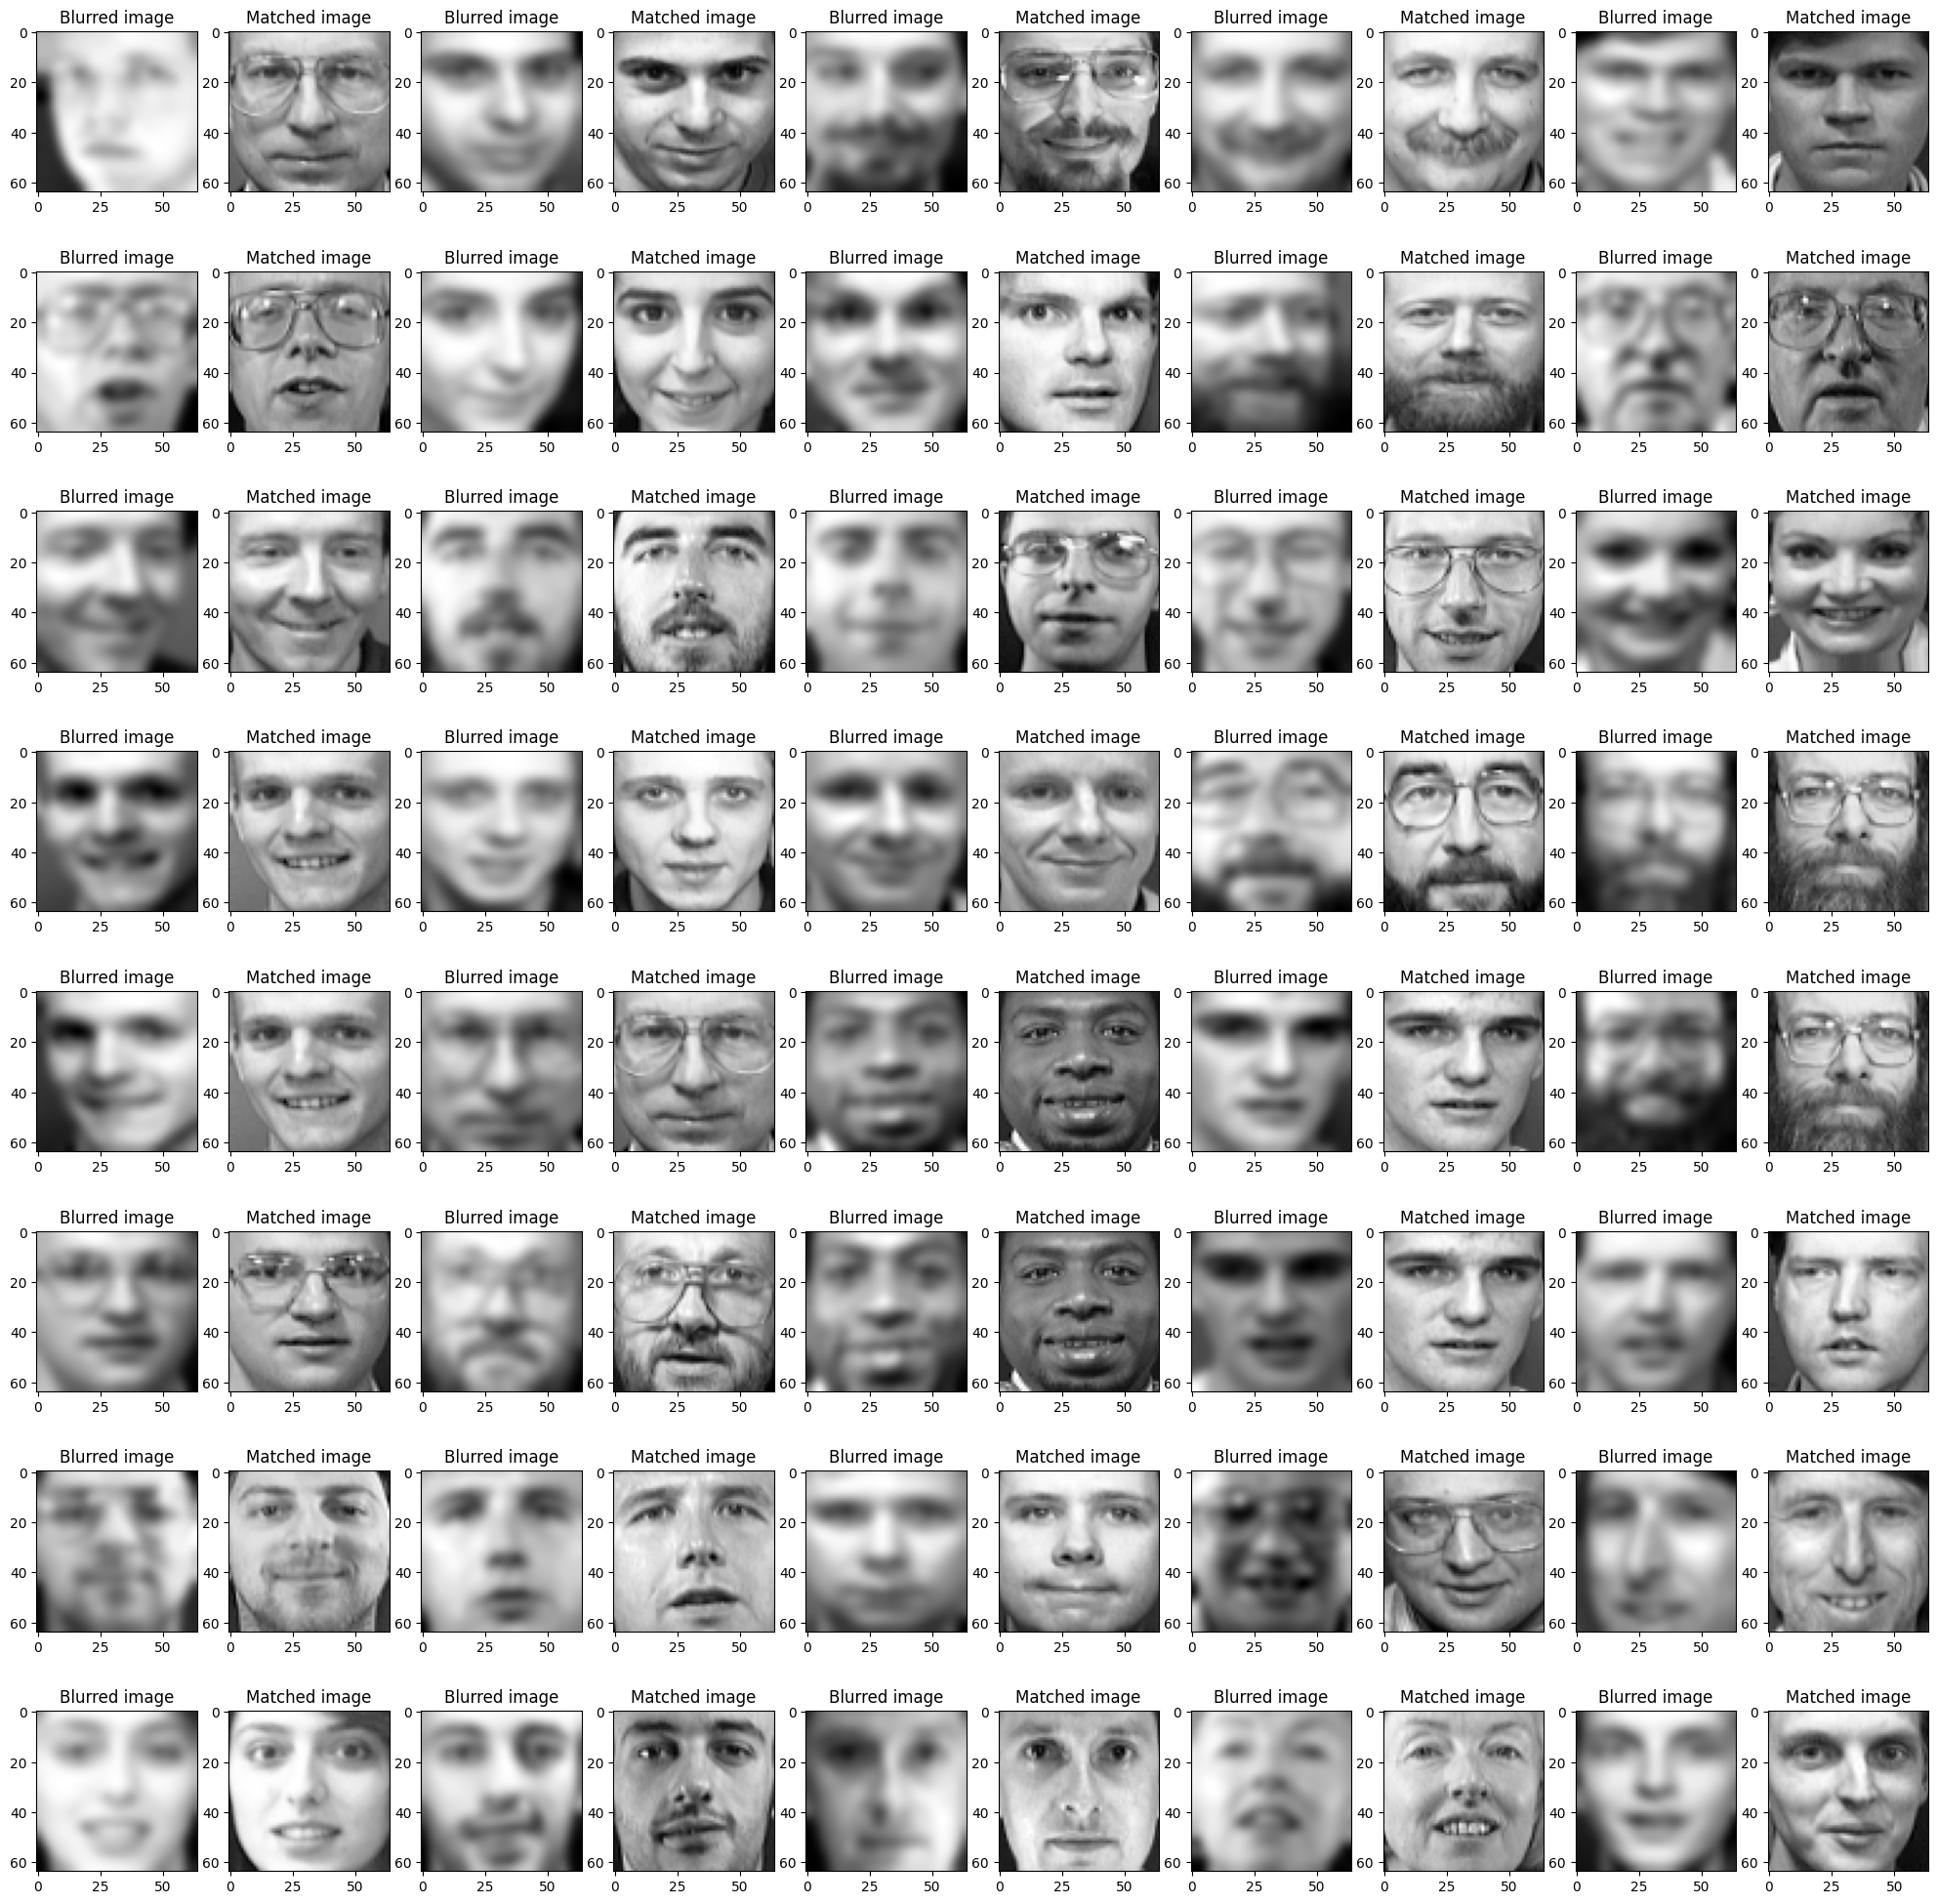

In [150]:
from scipy import ndimage
from random import randint

fig, axarr = plt.subplots(nrows=8, ncols=10, figsize=(25, 25))

for i in range(0, 40):
    # generate a random number between i * 10 and (i + 1) * 10 using math
    random_index = randint(i * 10, (i + 1) * 10)
    # random_index = np.random.randint()
    # get image at random_index
    img = data.images[random_index]
    # blur the image
    blurred_img = ndimage.gaussian_filter(img, sigma=2)
    # plot the blurred image and the predicted image from predict_match
    match_id = predict_match(blurred_img, lr)
    # show blurred image and matched image in the subplot
    row = i % 8
    col = i // 8
    axarr[row, col * 2].imshow(blurred_img, cmap='gray')
    axarr[row, col * 2].set_title("Blurred image")
    axarr[row, col * 2 + 1].imshow(data.images[match_id * 10], cmap='gray')
    axarr[row, col * 2 + 1].set_title("Matched image")

In [151]:
# test time based performance for matching
import time
import random

start_time = time.time()

correct_matches = 0
incorrect_matches = 0

for i in range(40):
    # generate a random number between i * 10 and (i + 1) * 10 using math
    random_index = randint(i * 10, (i + 1) * 10)
    img = data.images[random_index]
    # blur the image
    blurred_img = ndimage.gaussian_filter(img, sigma=2)
    # predict the match
    match_id = predict_match(blurred_img, lr)
    # check if match is correct
    if match_id == random_index // 10:
        correct_matches += 1
    else:
        incorrect_matches += 1

end_time = time.time()
print("Time taken for 40 predictions is {:.2f} seconds".format(end_time - start_time))
print("Correct matches: {}, Incorrect matches: {}".format(correct_matches, incorrect_matches))

Time taken for 40 predictions is 0.02 seconds
Correct matches: 39, Incorrect matches: 1
